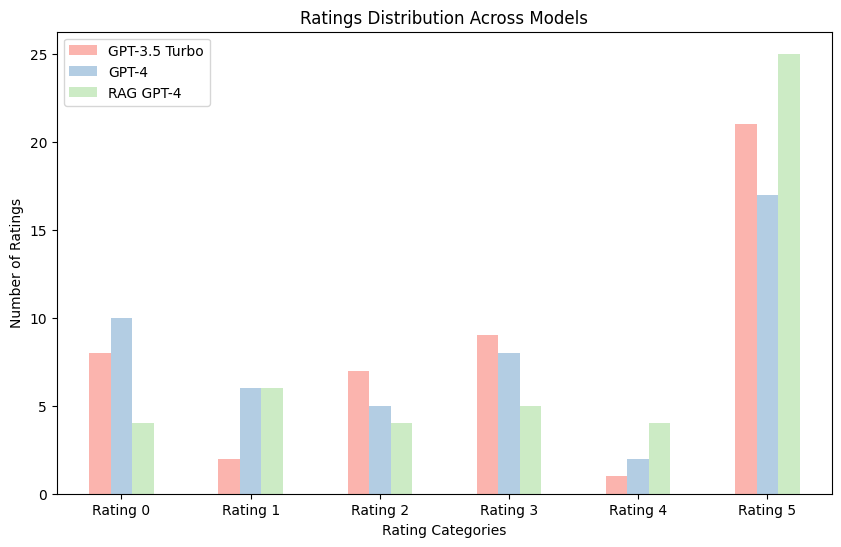

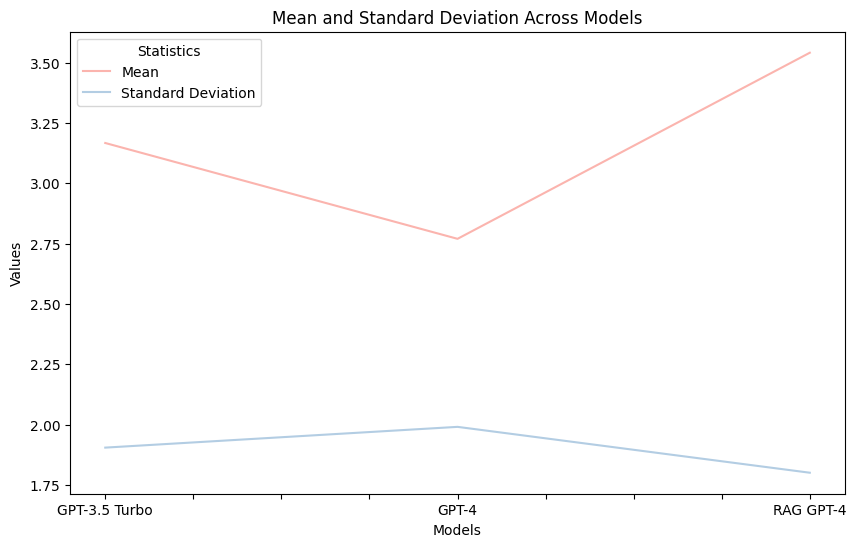

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Constructing the DataFrame
data_dict = {
    "Rating": ["Rating 0", "Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5", "Mean", "Standard Deviation"],
    "GPT-3.5 Turbo": [8, 2, 7, 9, 1, 21, 3.167, 1.905],
    "GPT-4": [10, 6, 5, 8, 2, 17, 2.770, 1.991],
    "RAG GPT-4": [4, 6, 4, 5, 4, 25, 3.541, 1.801]

}

performance_data = pd.DataFrame(data_dict)
ratings_data = performance_data.iloc[:6].set_index("Rating")
stats_data = performance_data.iloc[6:].set_index("Rating")


cmap = plt.get_cmap("Pastel1")
colors = cmap(range(len(ratings_data.columns)))


# Plotting bar charts for Ratings 0-5
ax = ratings_data.plot(kind='bar', figsize=(10, 6), title="Ratings Distribution Across Models", color=colors)
ax.set_xlabel("Rating Categories")
ax.set_ylabel("Number of Ratings")
plt.xticks(rotation=0)
plt.set_cmap('Pastel2')
plt.show()

# Plotting Mean and Standard Deviation
ax_stats = stats_data.T.plot(kind='line', figsize=(10, 6), title="Mean and Standard Deviation Across Models", color=colors[:len(stats_data.columns)])
ax_stats.set_xlabel("Models")
ax_stats.set_ylabel("Values")
plt.xticks(rotation=0)
plt.legend(title="Statistics")
plt.show()


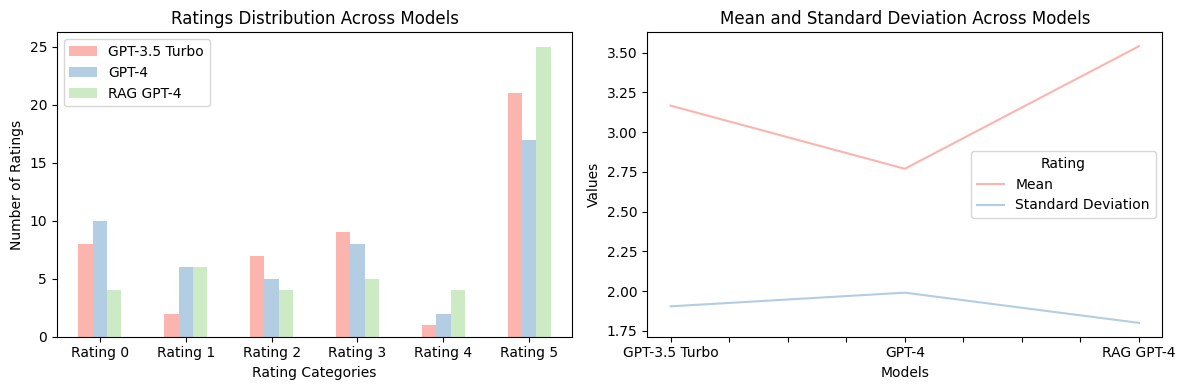

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Constructing the DataFrame
data_dict = {
    "Rating": ["Rating 0", "Rating 1", "Rating 2", "Rating 3", "Rating 4", "Rating 5", "Mean", "Standard Deviation"],
    "GPT-3.5 Turbo": [8, 2, 7, 9, 1, 21, 3.167, 1.905],
    "GPT-4": [10, 6, 5, 8, 2, 17, 2.770, 1.991],
    "RAG GPT-4": [4, 6, 4, 5, 4, 25, 3.541, 1.801]
}

performance_data = pd.DataFrame(data_dict)
ratings_data = performance_data.iloc[:6].set_index("Rating")
stats_data = performance_data.iloc[6:].set_index("Rating")


cmap = plt.get_cmap("Pastel1")
colors = cmap(range(len(ratings_data.columns)))


# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plotting bar charts for Ratings 0-5 on the first axis
ratings_data.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Ratings Distribution Across Models')
ax1.set_xlabel('Rating Categories')
ax1.set_ylabel('Number of Ratings')
ax1.tick_params(axis='x', rotation=0)

# Plotting Mean and Standard Deviation on the second axis
stats_data.T.plot(kind='line', ax=ax2, color=colors[:len(stats_data.columns)])
ax2.set_title('Mean and Standard Deviation Across Models')
ax2.set_xlabel('Models')
ax2.set_ylabel('Values')
ax2.tick_params(axis='x', rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()



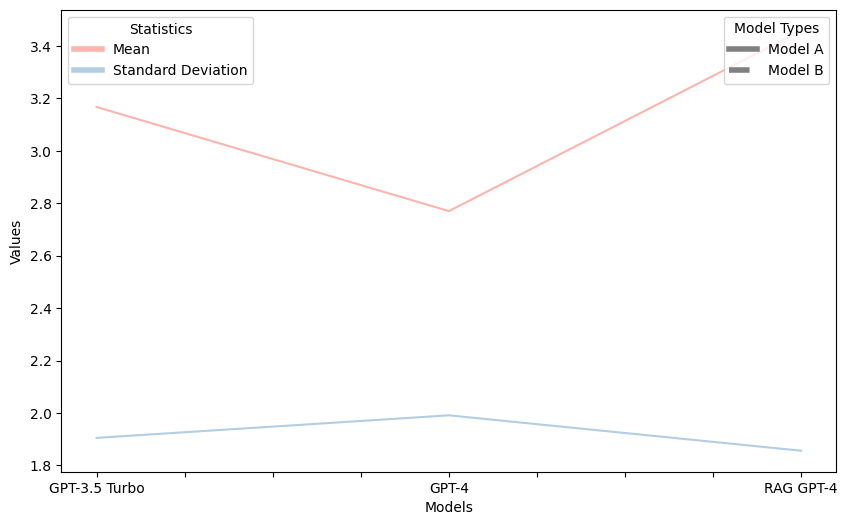

In [14]:
ax_stats = stats_data.T.plot(kind='line', figsize=(10, 6), color=colors)
ax_stats.set_xlabel("Models")
ax_stats.set_ylabel("Values")
plt.xticks(rotation=0)

from matplotlib.lines import Line2D
legend_elements1 = [Line2D([0], [0], color=c, lw=4, label=f'{stat}') for c, stat in zip(colors, stats_data.index)]
legend1 = plt.legend(handles=legend_elements1, title="Statistics", loc='upper left')

# Suppose another set of legends if necessary, for example, model types
legend_elements2 = [Line2D([0], [0], color='gray', lw=4, linestyle='-', label='Model A'),
                    Line2D([0], [0], color='gray', lw=4, linestyle='--', label='Model B')]
legend2 = plt.legend(handles=legend_elements2, title="Model Types", loc='upper right')

# Add the first legend manually
ax_stats.add_artist(legend1)

plt.show()

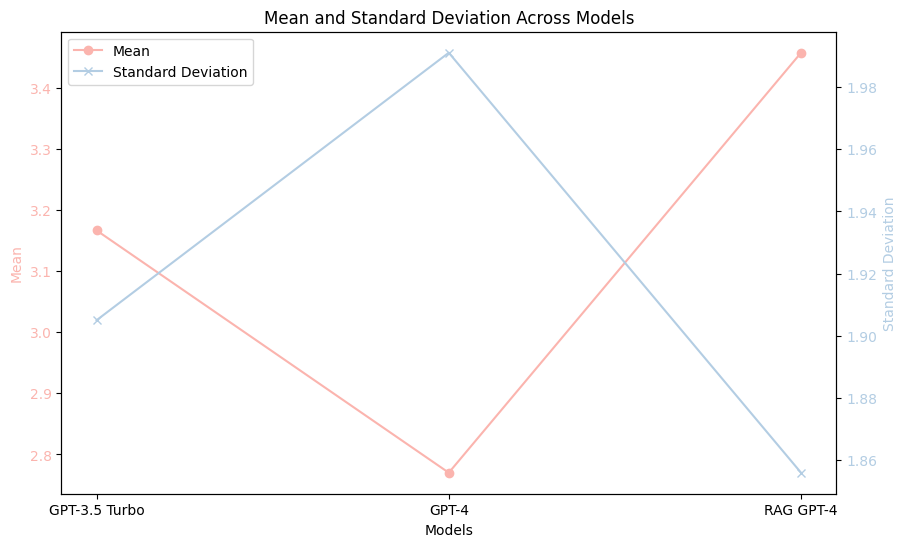

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First line plot (Mean values)
color = colors[0]
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean', color=color)
line1 = ax1.plot(stats_data.columns, stats_data.loc['Mean', :], color=color, label='Mean', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()  
color = colors[1]
ax2.set_ylabel('Standard Deviation', color=color)
line2 = ax2.plot(stats_data.columns, stats_data.loc['Standard Deviation', :], color=color, label='Standard Deviation', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Added legends for each line
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')

plt.title("Mean and Standard Deviation Across Models")
plt.xticks(rotation=0)
plt.show()

/var/folders/19/k5nzfj4j5r137510y28tk63w0000gn/T/ipykernel_47894/812228592.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Type'] = data['Type'].fillna(method='ffill')


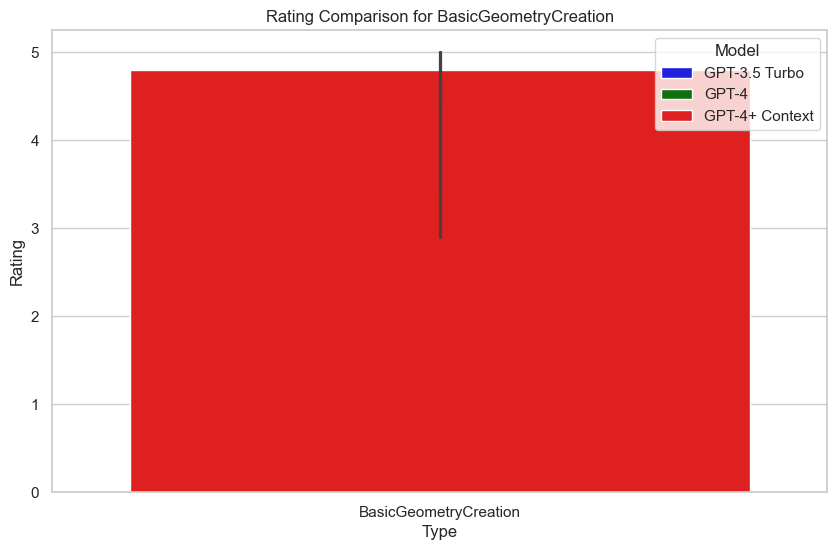

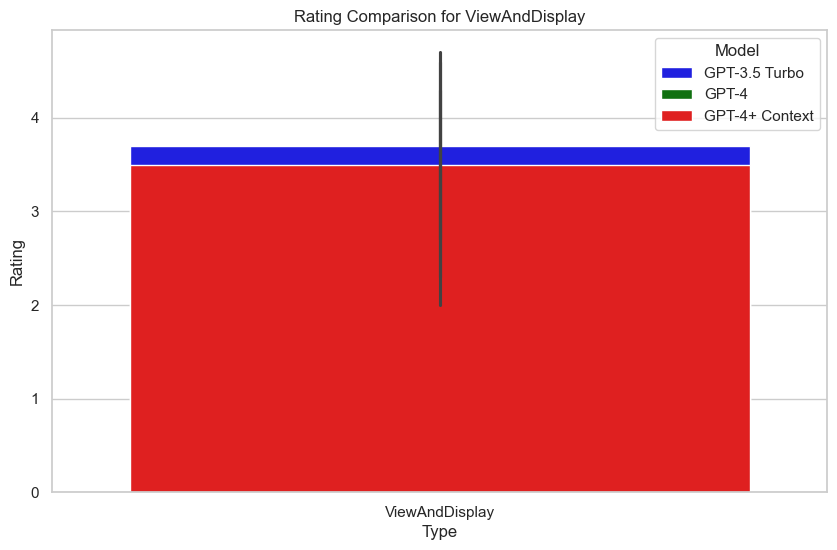

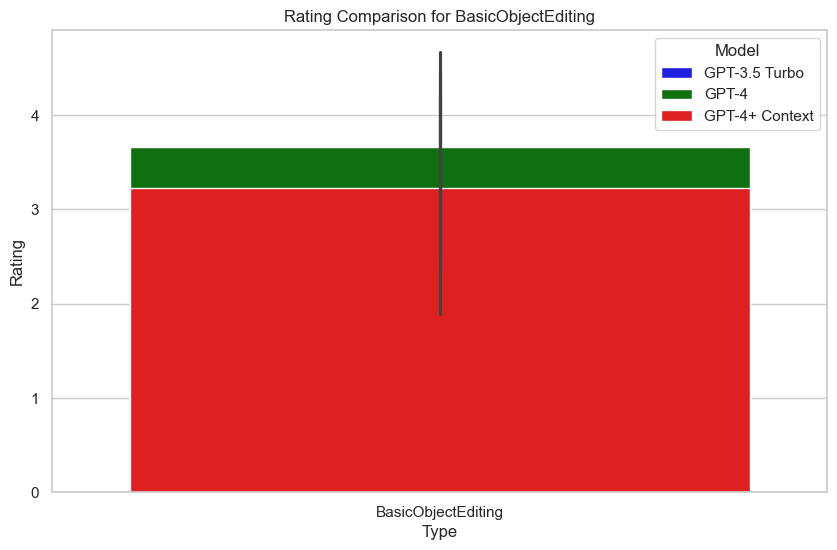

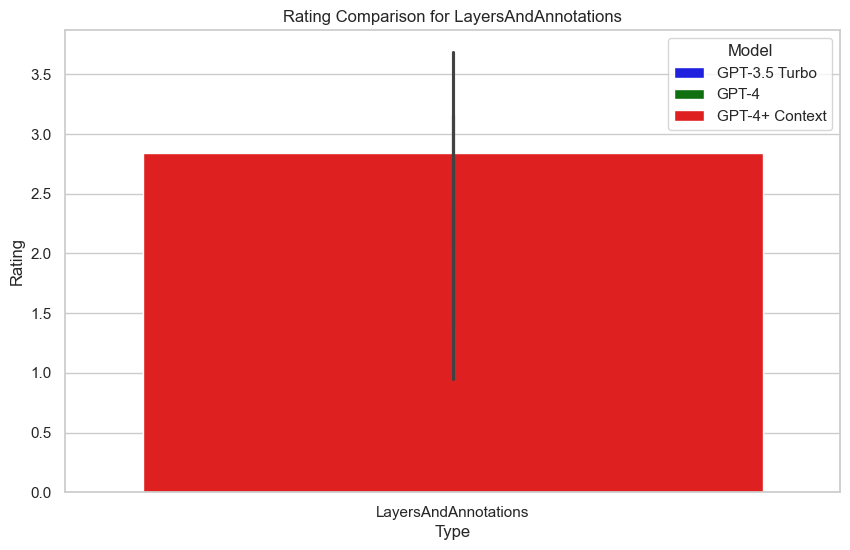

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/Users/shararenorouzi/Downloads/results.xlsx')
data['Type'] = data['Type'].fillna(method='ffill')

# Set the visual style
sns.set(style="whitegrid")

# Function to create a chart for each category
def plot_ratings(data, category):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data[data['Type'] == category],
                x='Type', y='gpt-3.5-turbo rating', color='blue', label='GPT-3.5 Turbo')
    sns.barplot(data=data[data['Type'] == category],
                x='Type', y='gpt-4 rating', color='green', label='GPT-4')
    sns.barplot(data=data[data['Type'] == category],
                x='Type', y='gpt-4+ Context rating', color='red', label='GPT-4+ Context')
    plt.title(f'Rating Comparison for {category}')
    plt.ylabel('Rating')
    plt.legend(title='Model')
    plt.show()

# Plot for each category
categories = data['Type'].unique()
for category in categories:
    plot_ratings(data, category)


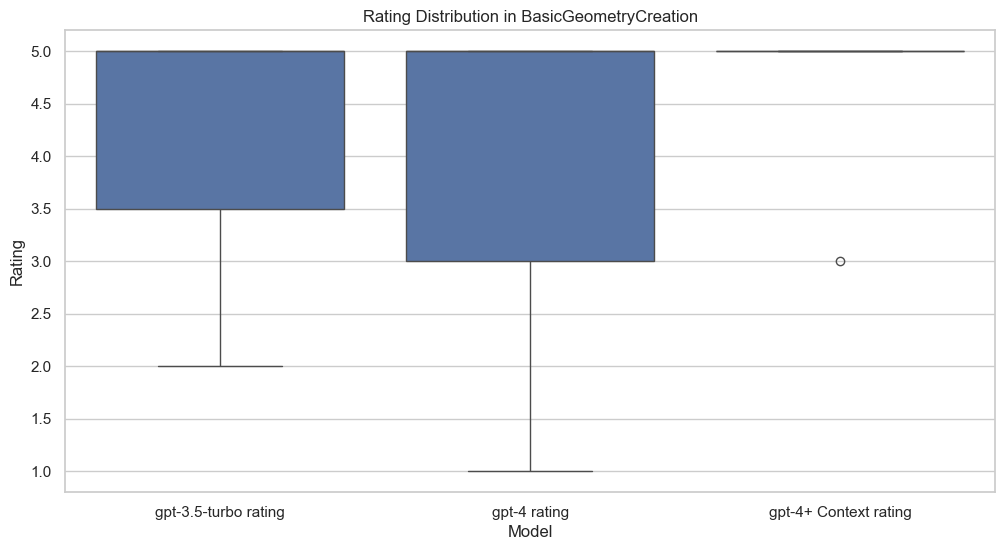

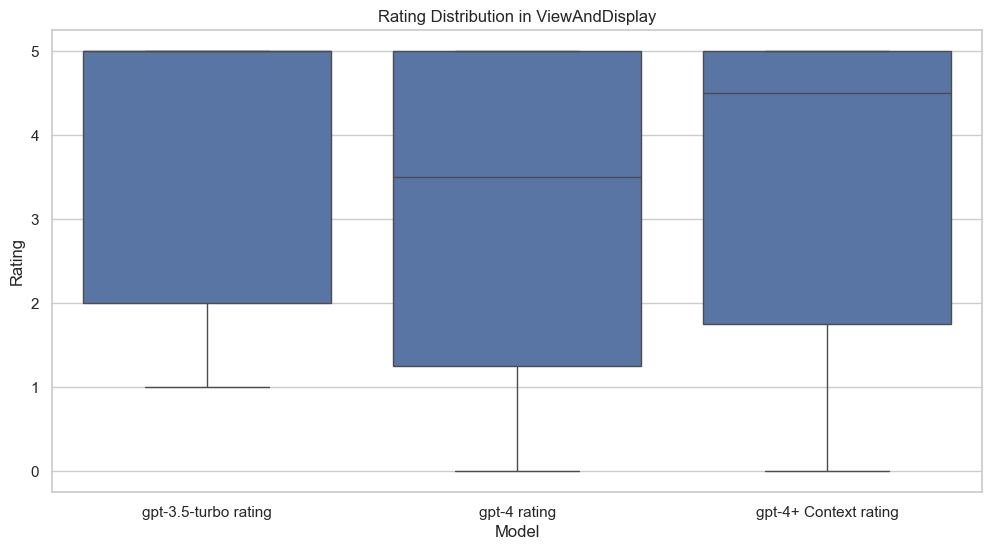

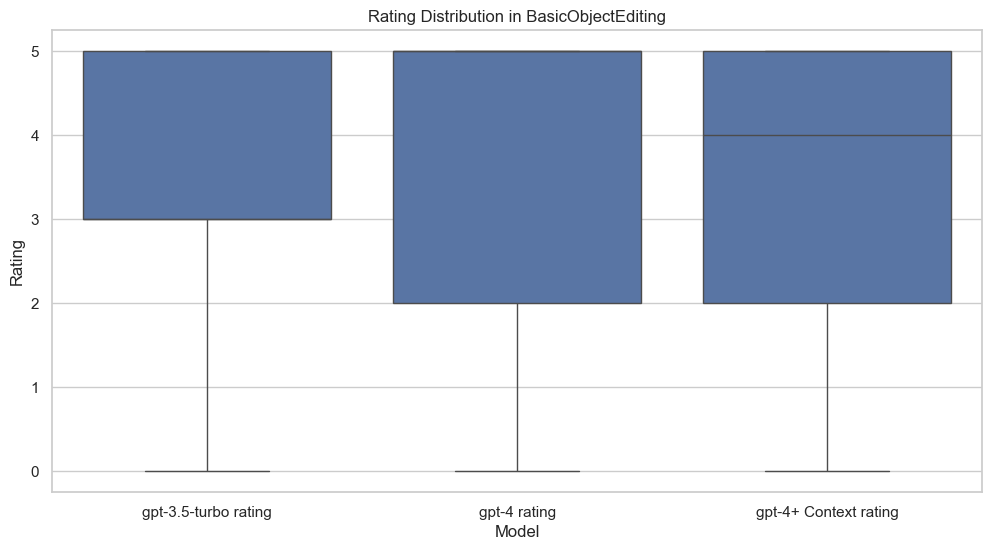

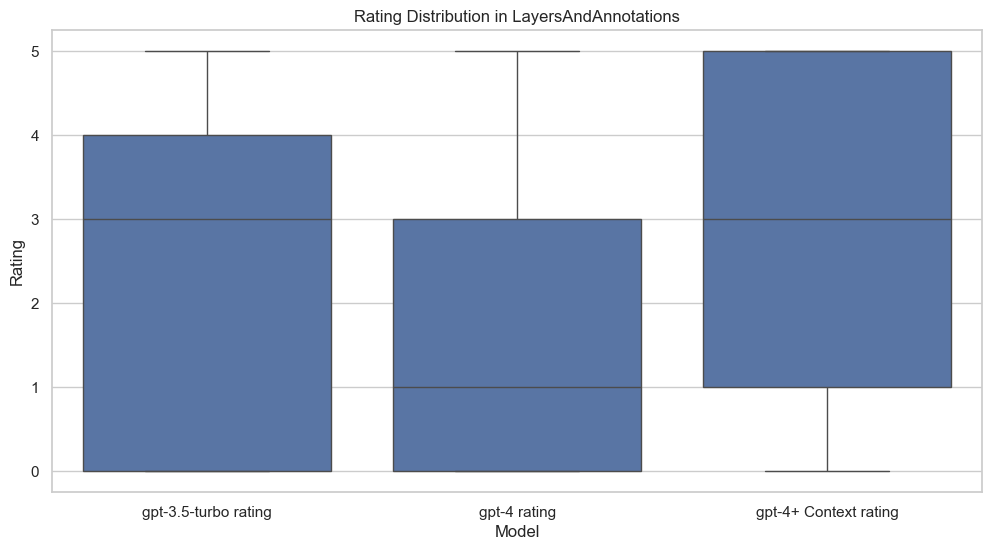

In [31]:
sns.set(style="whitegrid")

# Prepare data for plotting
melted_data = data.melt(id_vars='Type', value_vars=['gpt-3.5-turbo rating', 'gpt-4 rating', 'gpt-4+ Context rating'],
                        var_name='Model', value_name='Rating')

# Function to create a box plot for each category
def plot_distribution(data, category):
    plt.figure(figsize=(12, 6))
    category_data = data[data['Type'] == category]
    sns.boxplot(x='Model', y='Rating', data=category_data)
    plt.title(f'Rating Distribution in {category}')
    plt.xlabel('Model')
    plt.ylabel('Rating')
    plt.show()

# Plot distribution for each category
categories = data['Type'].unique()
for category in categories:
    plot_distribution(melted_data, category)

In [35]:
data = pd.read_excel('/Users/shararenorouzi/Downloads/results.xlsx')
data['Type'] = data['Type'].fillna(method='ffill')


/var/folders/19/k5nzfj4j5r137510y28tk63w0000gn/T/ipykernel_47894/3707105758.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Type'] = data['Type'].fillna(method='ffill')


In [36]:
data.groupby(['Type'])

,Type,instruction,gpt-3.5-turbo rating,gpt-4 rating,gpt-4+ Context rating
0,BasicGeometryCreation,"""Draw a straight line from (2,3,0) to (5,8,0)."",",5,5,5
1,BasicGeometryCreation,"""Create a circle centered at (4,4,0) with a ra...",5,5,5
2,BasicGeometryCreation,"""Construct a regular hexagon with each side me...",5,3,5
3,BasicGeometryCreation,"""Place a point at (7,7,7)."",",5,5,5
4,BasicGeometryCreation,"""Sketch a curve passing through (0,0,0), (3,3,...",5,5,5
5,BasicGeometryCreation,"""Generate an equilateral triangle with a side ...",3,3,3
6,BasicGeometryCreation,"""Create a rectangular plane with dimensions 4x...",5,5,5
7,BasicGeometryCreation,"""Draw an arc with a radius of 3 units from ang...",2,2,5
8,BasicGeometryCreation,"""Create a polyline connecting points (0,0,0), ...",5,5,5
9,BasicGeometryCreation,"""Draw a spiral with a radius of 5 units and 3 ...",2,1,5


/var/folders/19/k5nzfj4j5r137510y28tk63w0000gn/T/ipykernel_47894/1314114180.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Type'] = data['Type'].fillna(method='ffill')


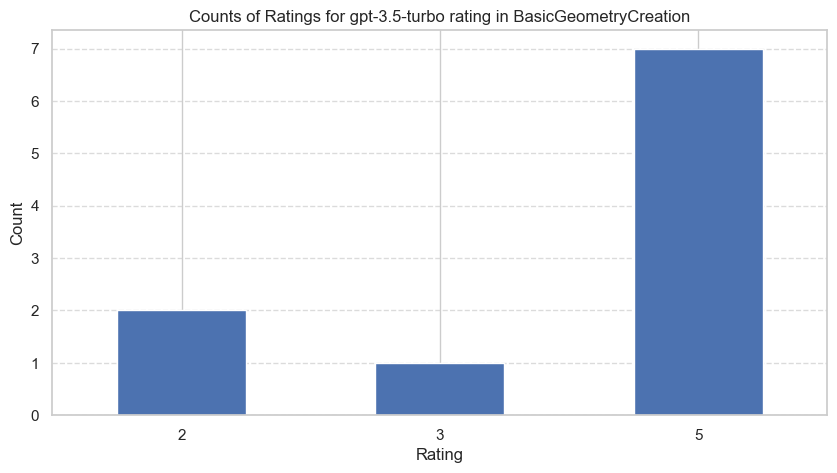

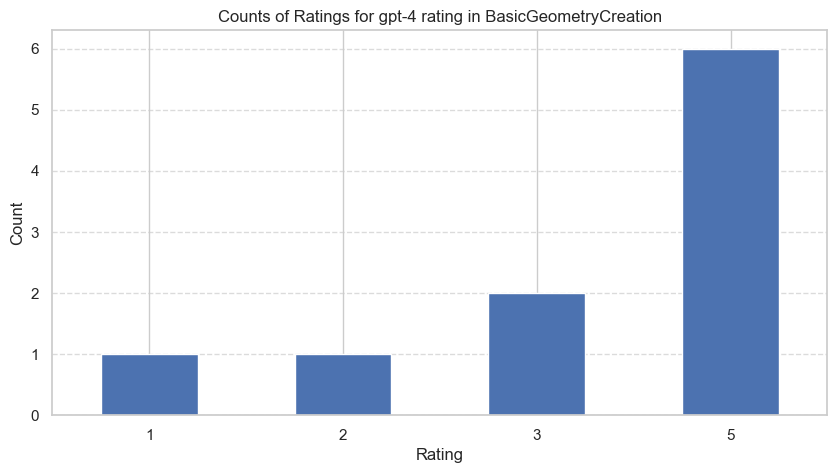

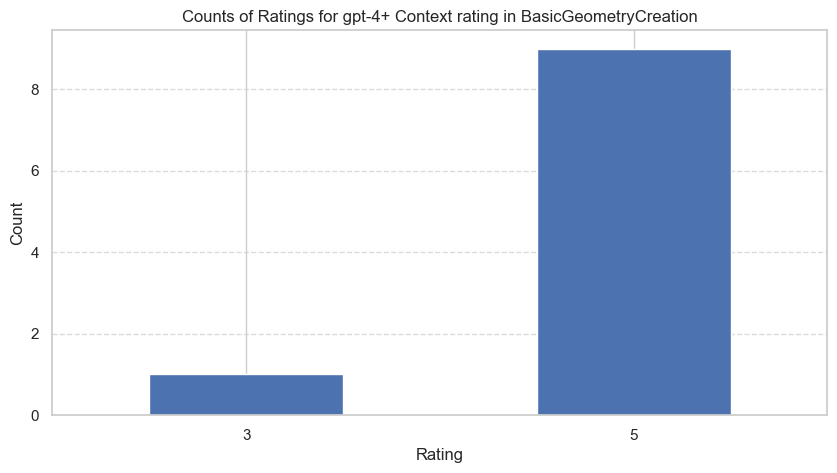

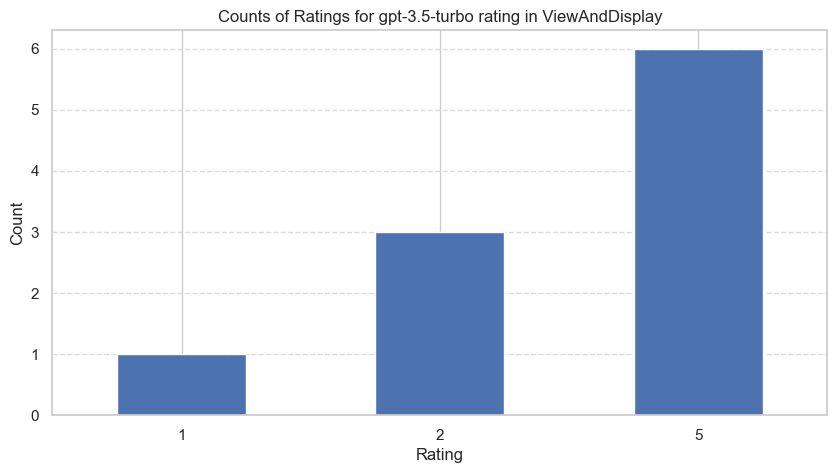

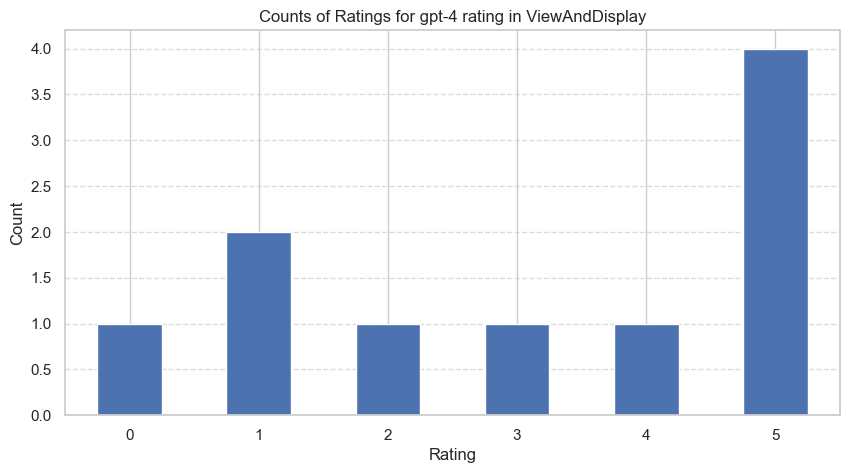

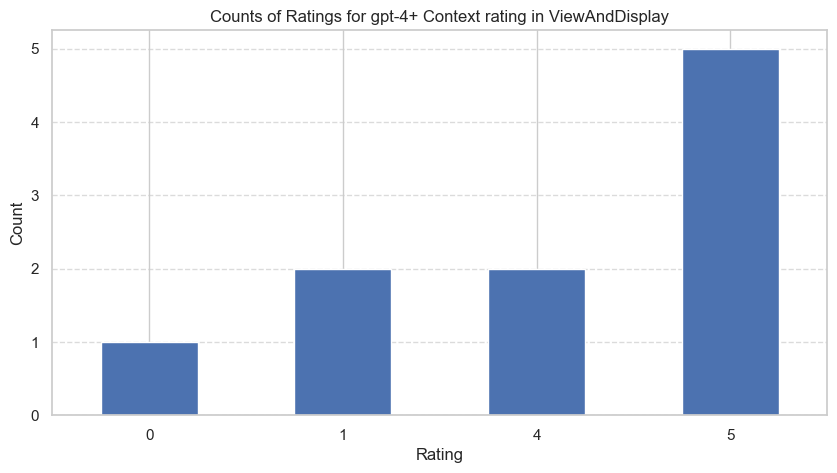

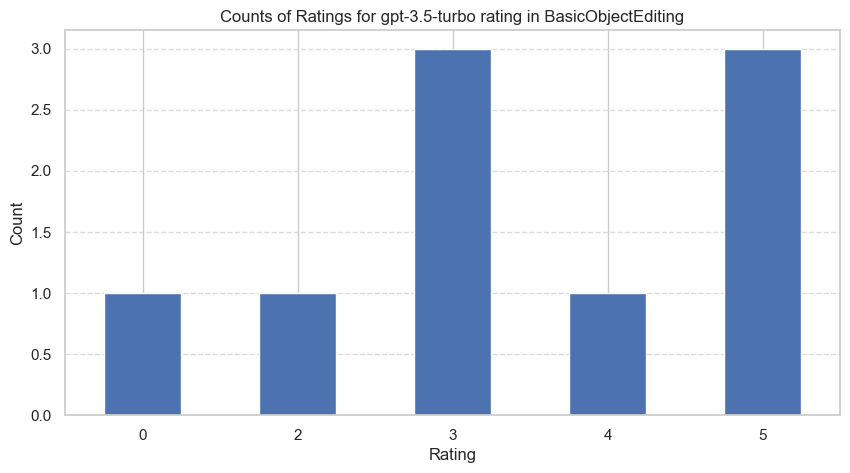

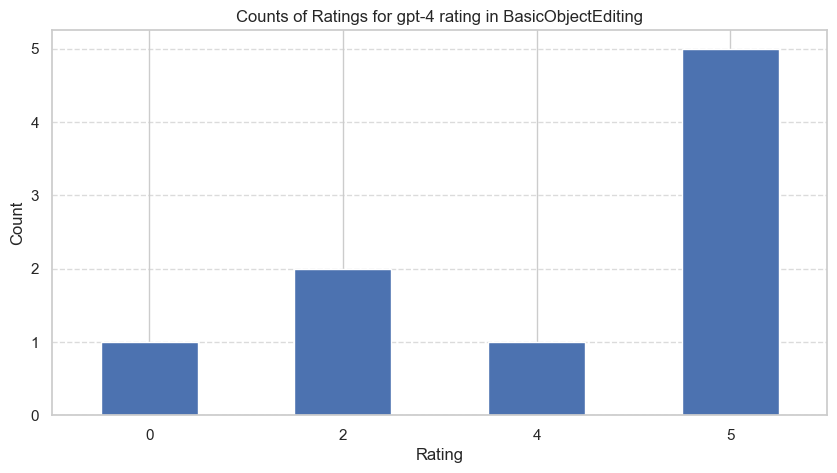

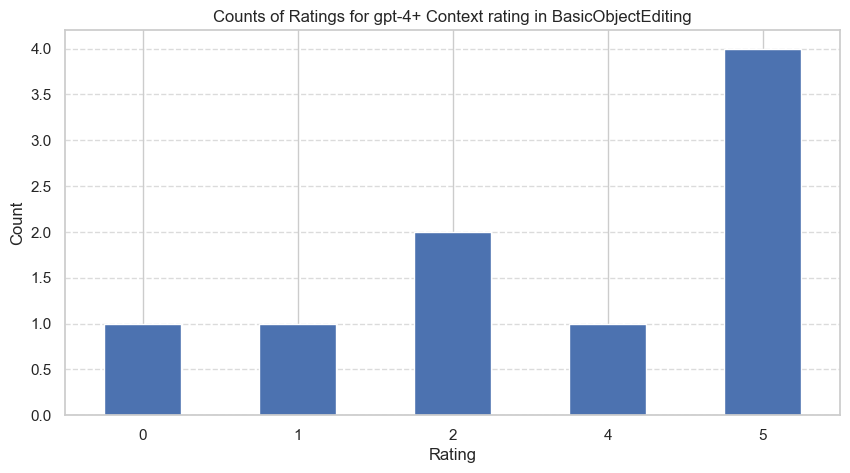

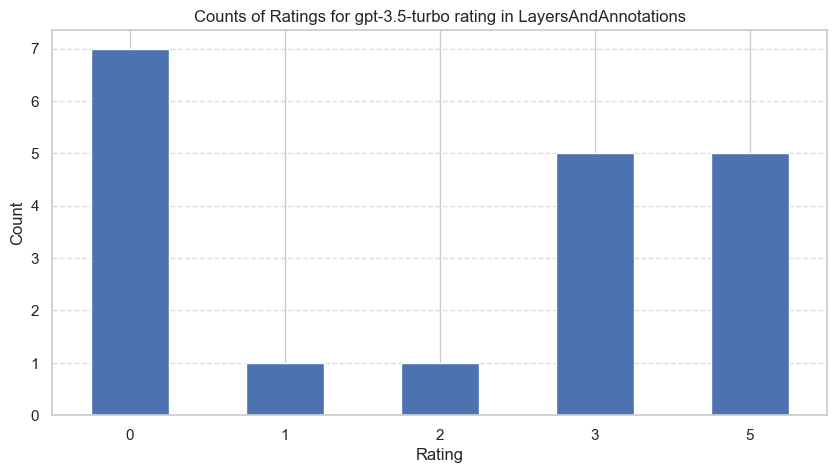

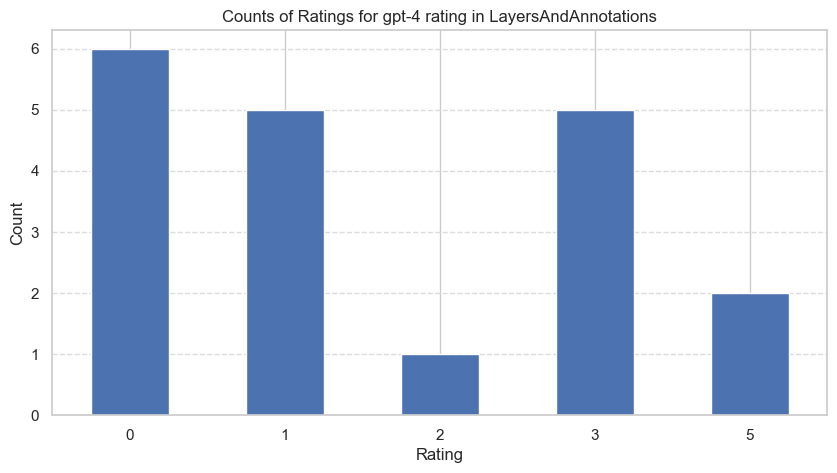

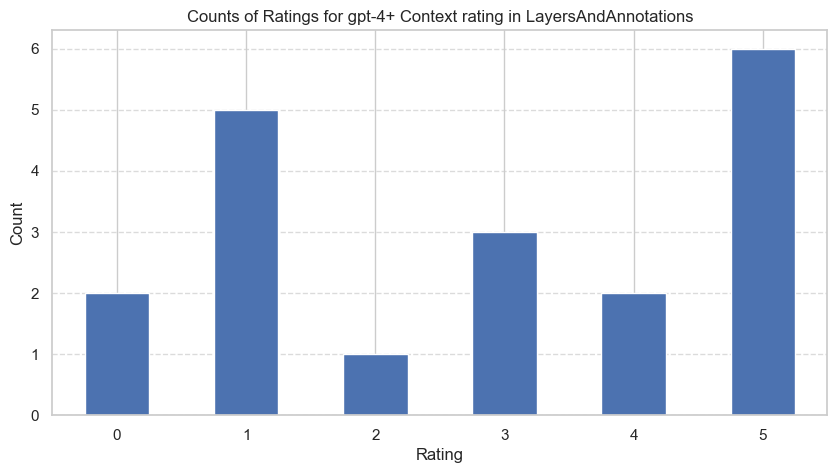

In [37]:
data['Type'] = data['Type'].fillna(method='ffill')

# Prepare a function to plot the count of ratings for each model
def plot_rating_counts(data, category, model):
    plt.figure(figsize=(10, 5))
    counts = data[data['Type'] == category][model].value_counts().sort_index()
    counts.plot(kind='bar')
    plt.title(f'Counts of Ratings for {model} in {category}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Keeps the rating values upright for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# List of models
models = ['gpt-3.5-turbo rating', 'gpt-4 rating', 'gpt-4+ Context rating']

# Iterate over each category and model to plot
categories = data['Type'].unique()
for category in categories:
    for model in models:
        plot_rating_counts(data, category, model)

/var/folders/19/k5nzfj4j5r137510y28tk63w0000gn/T/ipykernel_47894/1482616577.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Type'] = data['Type'].fillna(method='ffill')


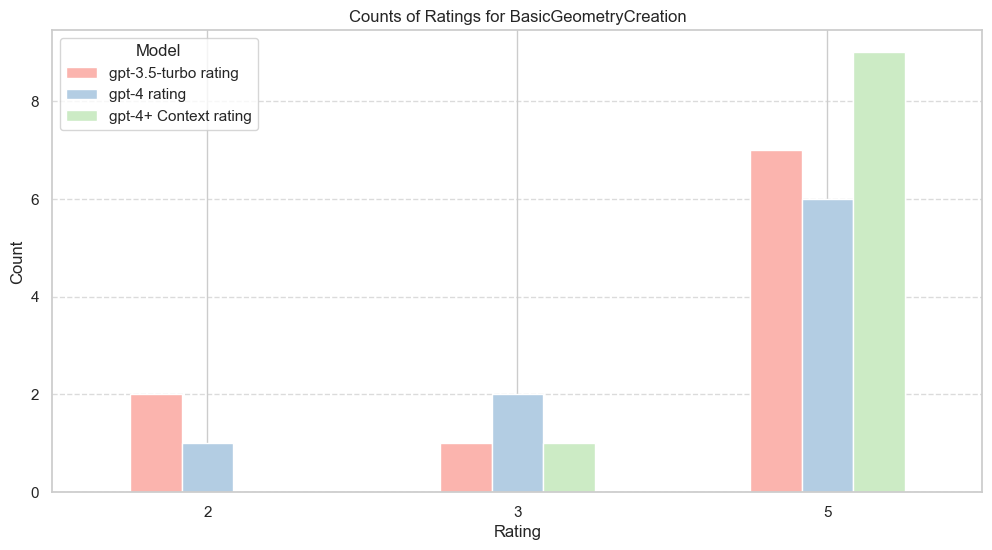

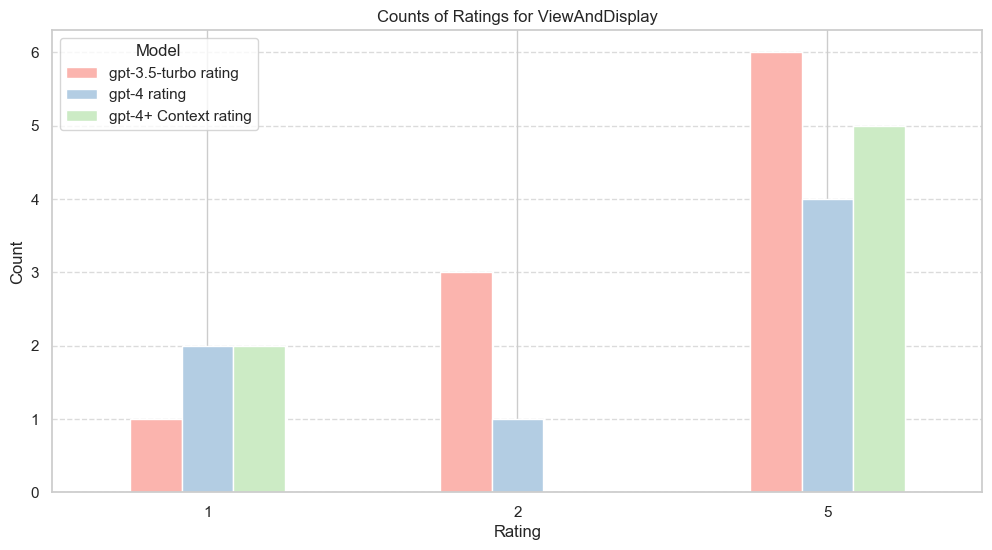

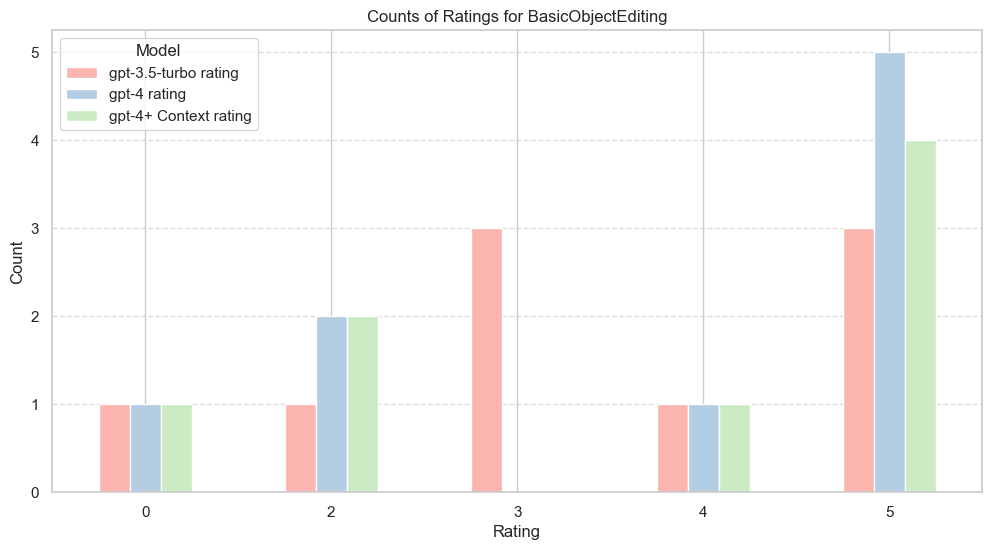

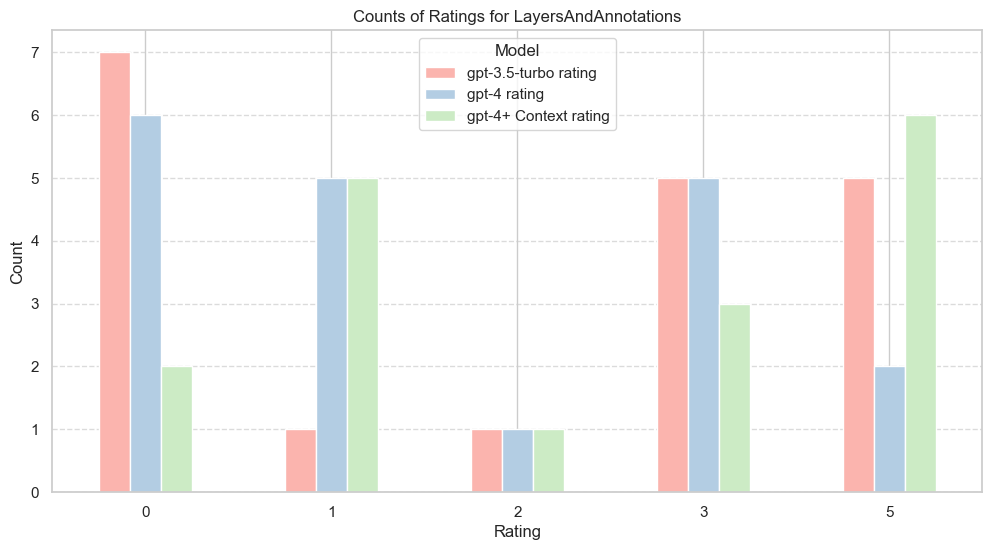

In [51]:

# Load the data
data = pd.read_excel('/Users/shararenorouzi/Downloads/results.xlsx')
data['Type'] = data['Type'].fillna(method='ffill')

# Prepare a function to plot grouped bar charts for the counts of ratings
def plot_grouped_rating_counts(data, category):
    # Models to consider
    models = ['gpt-3.5-turbo rating', 'gpt-4 rating', 'gpt-4+ Context rating']
    ratings_df = pd.DataFrame()

    # Calculate counts for each model
    for model in models:
        counts = data[data['Type'] == category][model].value_counts().sort_index()
        ratings_df[model] = counts

    # Ensure all rating values are represented in the dataframe
    ratings_df = ratings_df.fillna(0)
    
    # Plotting
    ratings_df.plot(kind='bar', figsize=(12, 6), color=colors)
    plt.title(f'Counts of Ratings for {category}')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Model')
    plt.show()

# Iterate over each category to plot
categories = data['Type'].unique()
for category in categories:
    plot_grouped_rating_counts(data, category)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/Users/shararenorouzi/Downloads/results.xlsx')
data['Type'] = data['Type'].fillna(method='ffill')

# Calculate the mean ratings for each category and model



/var/folders/19/k5nzfj4j5r137510y28tk63w0000gn/T/ipykernel_47894/3314944504.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Type'] = data['Type'].fillna(method='ffill')


In [47]:
data.drop

,Type,instruction,gpt-3.5-turbo rating,gpt-4 rating,gpt-4+ Context rating
0,BasicGeometryCreation,"""Draw a straight line from (2,3,0) to (5,8,0)."",",5,5,5
1,BasicGeometryCreation,"""Create a circle centered at (4,4,0) with a ra...",5,5,5
2,BasicGeometryCreation,"""Construct a regular hexagon with each side me...",5,3,5
3,BasicGeometryCreation,"""Place a point at (7,7,7)."",",5,5,5
4,BasicGeometryCreation,"""Sketch a curve passing through (0,0,0), (3,3,...",5,5,5
5,BasicGeometryCreation,"""Generate an equilateral triangle with a side ...",3,3,3
6,BasicGeometryCreation,"""Create a rectangular plane with dimensions 4x...",5,5,5
7,BasicGeometryCreation,"""Draw an arc with a radius of 3 units from ang...",2,2,5
8,BasicGeometryCreation,"""Create a polyline connecting points (0,0,0), ...",5,5,5
9,BasicGeometryCreation,"""Draw a spiral with a radius of 5 units and 3 ...",2,1,5


In [48]:
data = data.drop(columns=['instruction'])


In [49]:
mean_ratings = data.groupby('Type').mean()


In [54]:
mean_ratings = mean_ratings.reset_index()

# Melt the DataFrame to make it suitable for seaborn's barplot
melted_means = mean_ratings.melt(id_vars='Type', 
                                 value_vars=['gpt-3.5-turbo rating', 'gpt-4 rating', 'gpt-4+ Context rating'],
                                 var_name='Model', value_name='Average Rating')

# Set the visual style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='Type', y='Average Rating', hue='Model', data=melted_means, palette=colors)
plt.title('Average Ratings by Category and Model')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.legend(title='Model')
plt.show()

ValueError: cannot insert level_0, already exists